# Build Dataset
## Download the CQ500 dataset

The url was obtained from the following page: [http://headctstudy.qure.ai/dataset]()

In [1]:
import os.path

from src.datasets.cq500 import get_data, convert_nifti, select_imgs

In [ ]:
url = 'http://headctstudy.qure.ai/static/cq500_files.txt'
folder_path = os.path.expanduser('~/Code/datasets/cq500')
get_data(url, folder_path)

## Convert to Nifti
These images are in DICOM format, and will be converted to Nifti.

Also the file structure will change from: ``subject-id1/subject-id2/Unknown Study/CT-type`` (DICOM PATH) to: ``subject-id1/subject-id1_CT-type.nii.gz`` (NIfTI image)


In [2]:
nitfi_imgs_folder = convert_nifti(folder_path)

Converting CQ500-CT-111/CQ500CT111 CQ500CT111/Unknown Study/CT 4cc sec 150cc D3D on-2
  File already exists, skipping...
Converting CQ500-CT-111/CQ500CT111 CQ500CT111/Unknown Study/CT 4cc sec 150cc D3D on
  File already exists, skipping...
Converting CQ500-CT-111/CQ500CT111 CQ500CT111/Unknown Study/CT PLAIN THIN
  File already exists, skipping...
Converting CQ500-CT-111/CQ500CT111 CQ500CT111/Unknown Study/CT Plain
  File already exists, skipping...
Converting CQ500-CT-460/CQ500CT460 CQ500CT460/Unknown Study/CT PLAIN THIN
  File already exists, skipping...
Converting CQ500-CT-460/CQ500CT460 CQ500CT460/Unknown Study/CT Plain
  File already exists, skipping...
Converting CQ500-CT-460/CQ500CT460 CQ500CT460/Unknown Study/CT BONE
  File already exists, skipping...
Converting CQ500-CT-398/CQ500CT398 CQ500CT398/Unknown Study/CT Plain 3mm
  File already exists, skipping...
Converting CQ500-CT-466/CQ500CT466 CQ500CT466/Unknown Study/CT 55mm Plain
  File already exists, skipping...
Converting CQ5

## Select the images
Since some subjects have various images, I'll aim to take the images of bigger resolution (that involve only the head).

### Filtering the images

Since we are only looking for full skulls and the dataset provides (in some cases) different CTs for the same patient which may vary in the observed regions of the head, we will select the head CTs with image size smaller than 512x512x300 (for keeping the biggest resolution images but excluding those images that include the spine and other organs).
After this automatic selection, a manual selection is performed by excluding from the selected images those that doesn't contain the full skull. In this case, a list with the desired images for each subject is passed, so the automatic selection in that subject is ommited. An example is shown in the following image: on the left, the biggest resolution image is does not contain the full skull, so the right image was manually selected.



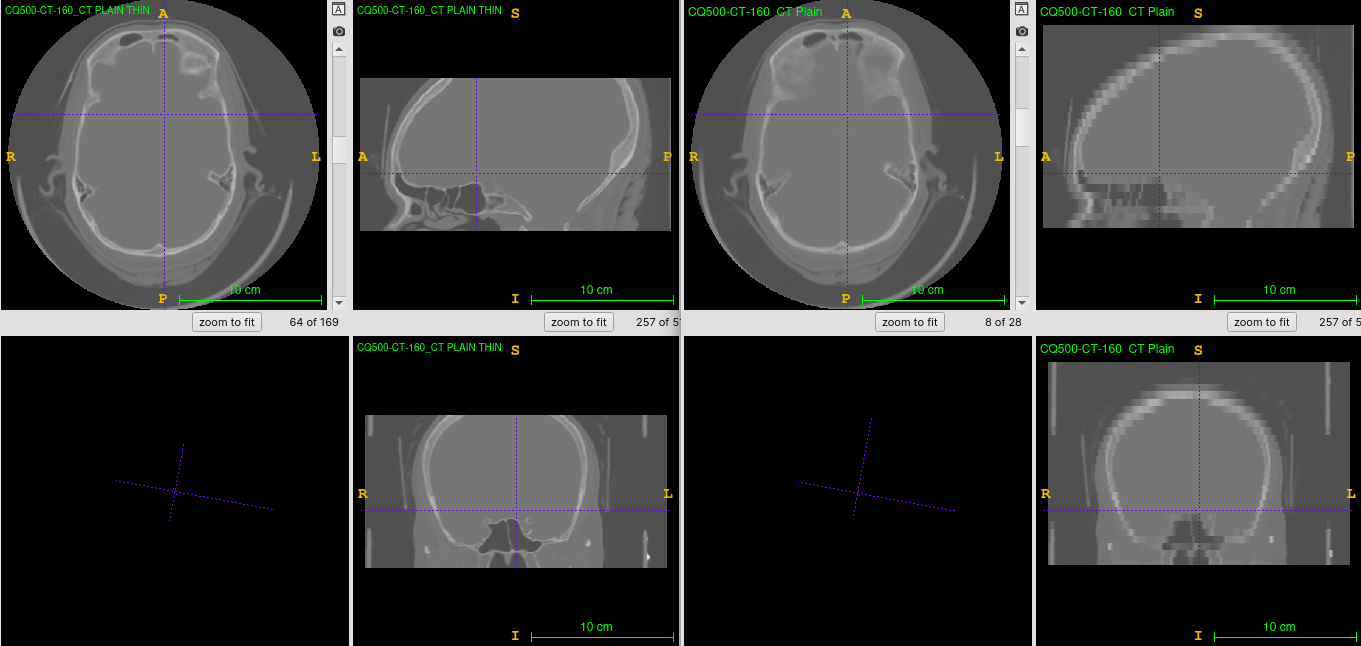

In [ ]:
preselected = ['CQ500-CT-7_CT Plain.nii.gz', 'CQ500-CT-38_CT Plain.nii.gz', 'CQ500-CT-44_CT 55mm Plain.nii.gz', 'CQ500-CT-51_CT Plain.nii.gz',
               'CQ500-CT-70_CT Plain.nii.gz', 'CQ500-CT-93_CT PRE CONTRAST THIN.nii.gz', 'CQ500-CT-116_CT Plain.nii.gz', 'CQ500-CT-123_CT Plain.nii.gz',
               'CQ500-CT-145_CT Plain.nii.gz', 'CQ500-CT-156_CT Plain.nii.gz', 'CQ500-CT-160_CT Plain.nii.gz', 'CQ500-CT-173_CT 2.55mm-2.nii.gz']
in_observation = ['CQ500-CT-6_CT 3.753.75mm Plain.nii.gz', 'CQ500-CT-127_CT Thin Plain.nii.gz']

In [4]:
nitfi_imgs_folder = '~/Code/datasets/cq500/converted'
select_imgs(nitfi_imgs_folder)

Selecting image for subject CQ500-CT-111
Copying /home/franco/Code/datasets/cq500/converted/CQ500-CT-111/CQ500-CT-111_CT PLAIN THIN.nii.gz to /home/franco/Code/datasets/cq500/converted/selected/CQ500-CT-111_CT PLAIN THIN.nii.gz
Selecting image for subject CQ500-CT-460
Copying /home/franco/Code/datasets/cq500/converted/CQ500-CT-460/CQ500-CT-460_CT PLAIN THIN.nii.gz to /home/franco/Code/datasets/cq500/converted/selected/CQ500-CT-460_CT PLAIN THIN.nii.gz
Selecting image for subject CQ500-CT-398
Copying /home/franco/Code/datasets/cq500/converted/CQ500-CT-398/CQ500-CT-398_CT Plain 3mm.nii.gz to /home/franco/Code/datasets/cq500/converted/selected/CQ500-CT-398_CT Plain 3mm.nii.gz
Selecting image for subject CQ500-CT-466
Copying /home/franco/Code/datasets/cq500/converted/CQ500-CT-466/CQ500-CT-466_CT Thin Plain.nii.gz to /home/franco/Code/datasets/cq500/converted/selected/CQ500-CT-466_CT Thin Plain.nii.gz
Selecting image for subject CQ500-CT-437
Copying /home/franco/Code/datasets/cq500/converte

KeyboardInterrupt: 

### Use a list with the selected images